# CH11: WOrking with Unlabeled Data - Clustering Analysis

In [63]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

## Grouping objects by similarity using k-means

### K-means clustering using scikit-learn

In [2]:
X, y = make_blobs(n_samples=150, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

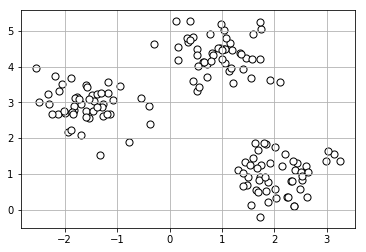

In [3]:
plt.scatter(X[:,0], X[:,1], c="white", marker="o", edgecolor="black", s=50)
plt.grid()
plt.show()

In [4]:
km = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

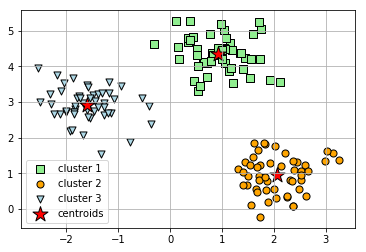

In [5]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c="lightgreen", marker="s", edgecolor="black", label="cluster 1")
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c="orange", marker="o", edgecolor="black", label="cluster 2")
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c="lightblue", marker="v", edgecolor="black", label="cluster 3")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker="*", c="red", edgecolor="black", label="centroids")
plt.legend(scatterpoints=1, loc="lower left")
plt.grid()
plt.show()

### k-means+++

In [6]:
km = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

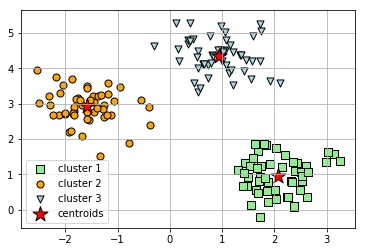

In [7]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c="lightgreen", marker="s", edgecolor="black", label="cluster 1")
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c="orange", marker="o", edgecolor="black", label="cluster 2")
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c="lightblue", marker="v", edgecolor="black", label="cluster 3")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker="*", c="red", edgecolor="black", label="centroids")
plt.legend(scatterpoints=1, loc="lower left")
plt.grid()
plt.show()

## Hard versus soft clustering

## Using the elbow method to find the optimal number of clusters

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

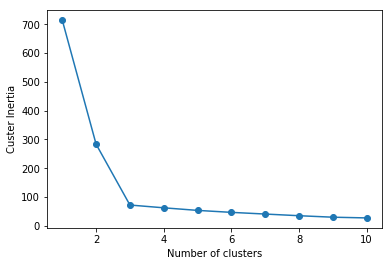

In [9]:
plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Custer Inertia")
plt.show()

## Quantifying the quality of clustering via silhouette plots

In [10]:
km = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

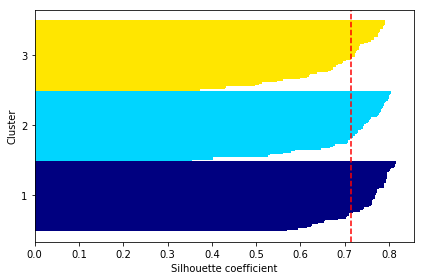

In [11]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

## Organizing clusters as a hierarchical tree

### Grouping clusters in bottom-up fashion

In [17]:
np.random.seed(123)

In [20]:
variables = ["X", "Y", "Z"]
labels = [ "ID_%d" % i for i in range(5) ]

X = np.random.random_sample([5, 3])*100
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,73.799541,18.249173,17.545176
ID_1,53.155137,53.182759,63.440096
ID_2,84.943179,72.445532,61.102351
ID_3,72.244338,32.295891,36.178866
ID_4,22.826323,29.371405,63.097612


In [23]:
row_dist = pd.DataFrame(squareform(pdist(df, metric="euclidean")), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,61.260840,70.417708,23.386820,69.260360
ID_1,61.260840,0.000000,37.242437,39.291647,38.560794
ID_2,70.417708,37.242437,0.000000,48.932958,75.616568
ID_3,23.386820,39.291647,48.932958,0.000000,56.349905
ID_4,69.260360,38.560794,75.616568,56.349905,0.000000


In [28]:
row_clusters = linkage(df.values, method="complete", metric="euclidean")

In [29]:
pd.DataFrame(row_clusters, columns=["row label 1", "row label 2", "distance", "count"])

,row label 1,row label 2,distance,count
0,0.0,3.0,23.386820,2.0
1,1.0,2.0,37.242437,2.0
2,4.0,5.0,69.260360,3.0
3,6.0,7.0,75.616568,5.0


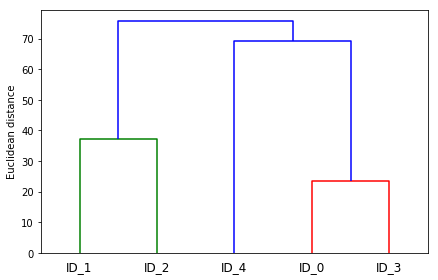

In [33]:
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show()

#### Ataching dendrograms to a heat map

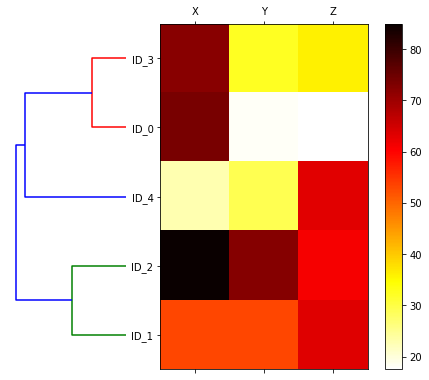

In [43]:
fig = plt.figure(figsize=(8, 8), facecolor="white")
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation="left")

df_rowclust = df.iloc[row_dendr["leaves"][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation="nearest", cmap="hot_r")

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([""] + list(df_rowclust.columns))
axm.set_yticklabels([""] + list(df_rowclust.index))
plt.show()

## Locating regions of high density via DBSCAN

In [46]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

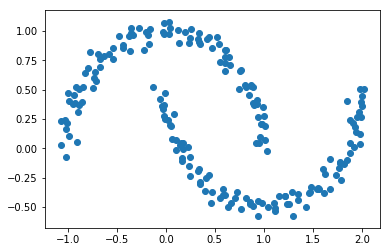

In [47]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

### K-Means & Hierarchical Clustering

In [51]:
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

In [53]:
ac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="complete")
y_ac = ac.fit_predict(X)

In [67]:
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
y_db = db.fit_predict(X)

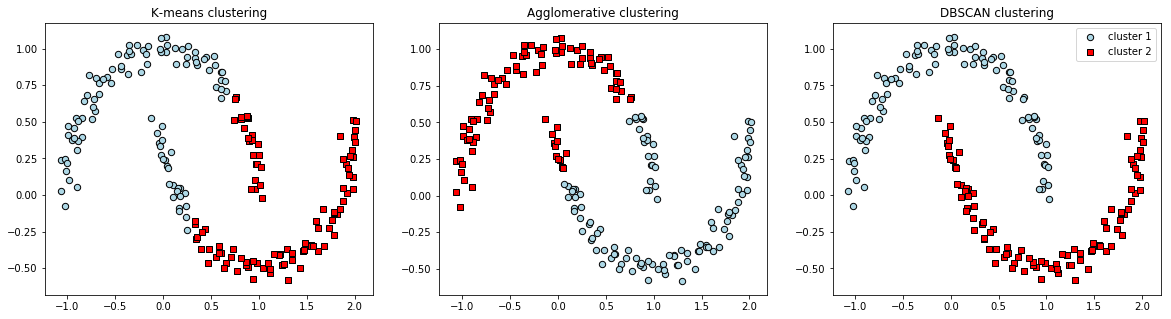

In [73]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c="lightblue", edgecolor="black", marker="o", s=40, label="cluster 1")
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c="red", edgecolor="black", marker="s", s=40, label="cluster 2")
ax1.set_title("K-means clustering")

ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c="lightblue", edgecolor="black", marker="o", s=40, label="cluster 1")
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c="red", edgecolor="black", marker="s", s=40, label="cluster 2")
ax2.set_title("Agglomerative clustering")

ax3.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c="lightblue", edgecolor="black", marker="o", s=40, label="cluster 1")
ax3.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c="red", edgecolor="black", marker="s", s=40, label="cluster 2")
ax3.set_title("DBSCAN clustering")

plt.legend()
plt.show()